In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the titanic dataset
# data = pd.read_csv('/kaggle/input/titanic/train.csv')
data = pd.read_csv('train.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Exploratory Data Analysis
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of cols:", num_cols)

Number of rows: 891
Number of cols: 12


In [11]:
missing_values = data.isnull().sum()
print("Missing Values: ")
print(missing_values)

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
from sklearn.impute import SimpleImputer

# The .ravel() method flattens the 2D array into 1D, making it compatible with pandas column assignment.
#Age is a continuous variable hence we use average imputation. (Simple imputation)
age_imputer = SimpleImputer(strategy='mean')
data['Age'] = age_imputer.fit_transform(data[['Age']]).ravel()

#Cabin and Embarked are categorical variables, hence we use mode imputation instead of mean imputation
cabin_imputer = SimpleImputer(strategy='most_frequent')
data['Cabin'] = cabin_imputer.fit_transform(data[['Cabin']]).ravel()

embarked_imputer = SimpleImputer(strategy='most_frequent')
data['Embarked'] = embarked_imputer.fit_transform(data[['Cabin']]).ravel()

missing_values = data.isnull().sum()
print('Missing Values:')
print(missing_values)






Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [13]:
passanger_class = data['Pclass'].value_counts()
print('Passenger class distribution')
print(passanger_class)

Passenger class distribution
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [14]:
embarked_counts = data['Embarked'].value_counts()
print("Passanger embarked from each port")
print(embarked_counts)


Passanger embarked from each port
Embarked
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 147, dtype: int64


In [15]:
survived_count = data['Survived'].sum()
print("Number of passengers who survived :", survived_count)


Number of passengers who survived : 342


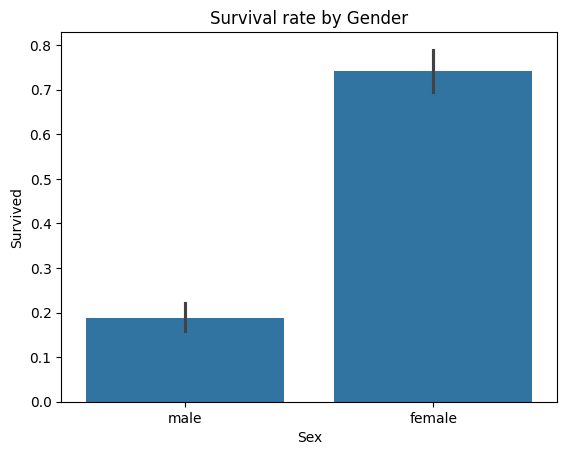

In [19]:
#Data VIsualization
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting survival rate by gender
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Survival rate by Gender")
plt.show()

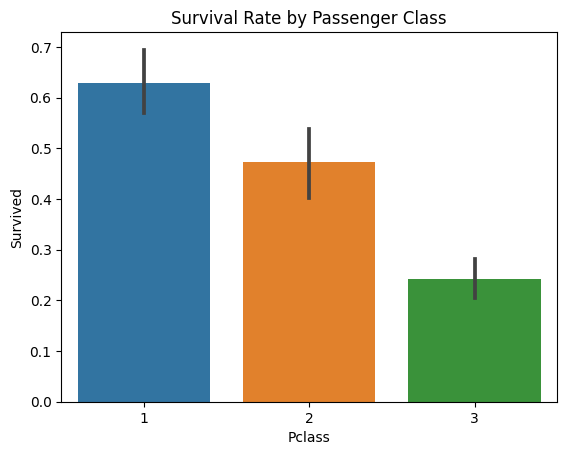

In [ ]:
# Plotting survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

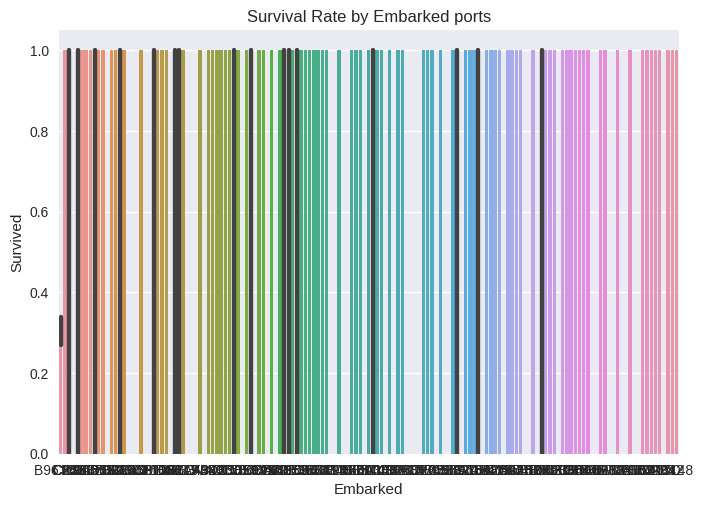

In [ ]:
# Plotting survival rate by Embarked port
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title('Survival Rate by Embarked ports')
plt.show()

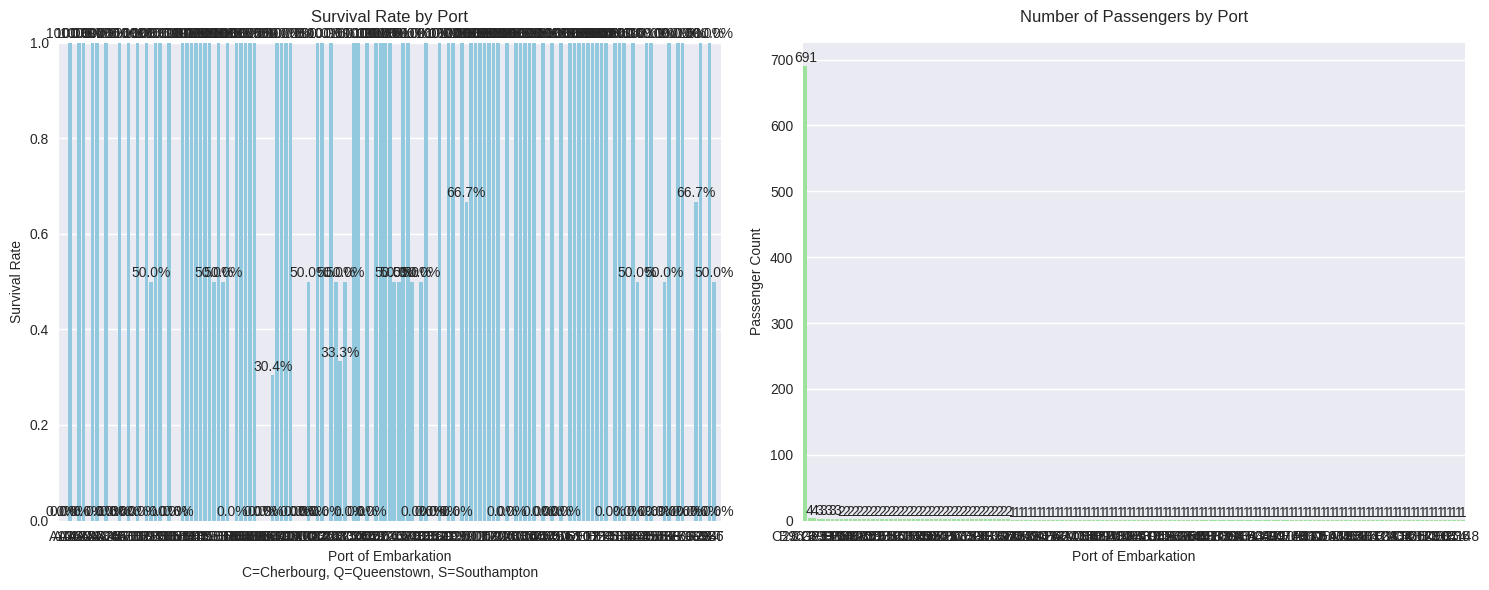

In [ ]:
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Survival Rate
survival_by_port = data.groupby('Embarked')['Survived'].mean()
sns.barplot(x=survival_by_port.index, y=survival_by_port.values, ax=ax1, color='skyblue')
ax1.set_title('Survival Rate by Port', fontsize=12, pad=15)
ax1.set_xlabel('Port of Embarkation\nC=Cherbourg, Q=Queenstown, S=Southampton', fontsize=10)
ax1.set_ylabel('Survival Rate', fontsize=10)
ax1.set_ylim(0, 1)

# Add percentage labels on bars
for i, v in enumerate(survival_by_port.values):
   ax1.text(i, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

# Plot 2: Passenger Count
port_counts = data['Embarked'].value_counts()
sns.barplot(x=port_counts.index, y=port_counts.values, ax=ax2, color='lightgreen')
ax2.set_title('Number of Passengers by Port', fontsize=12, pad=15)
ax2.set_xlabel('Port of Embarkation', fontsize=10)
ax2.set_ylabel('Passenger Count', fontsize=10)

# Add count labels on bars
for i, v in enumerate(port_counts.values):
   ax2.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age Distribution by Survival')

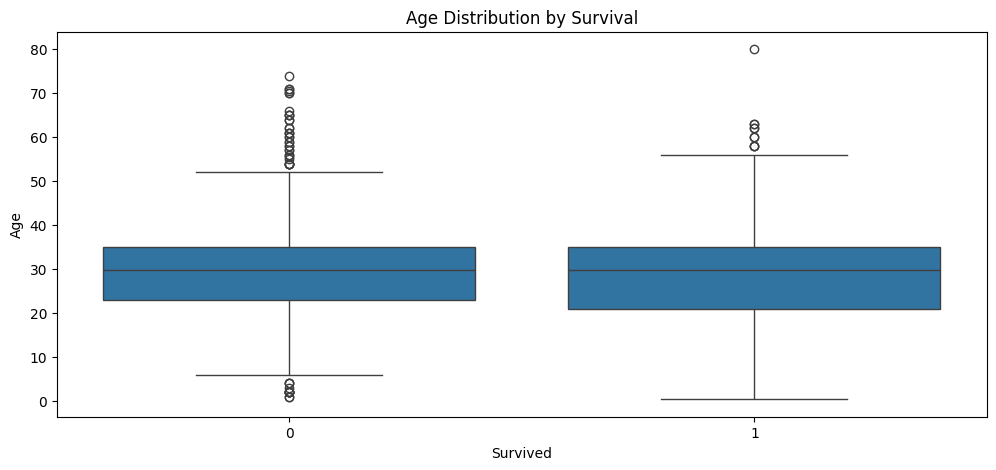

In [20]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival')

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

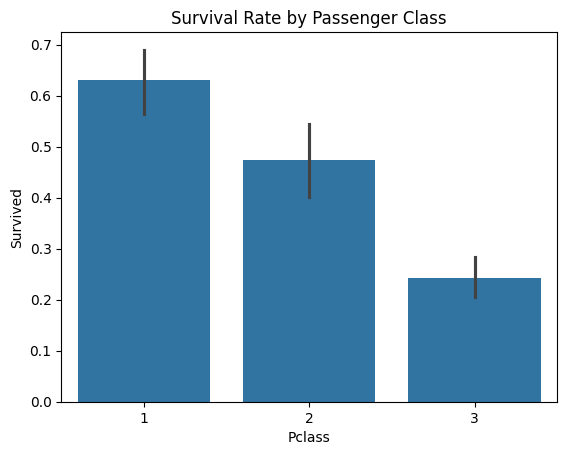

In [21]:
# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')

Text(0.5, 1.0, 'Fare Distribution by Class')

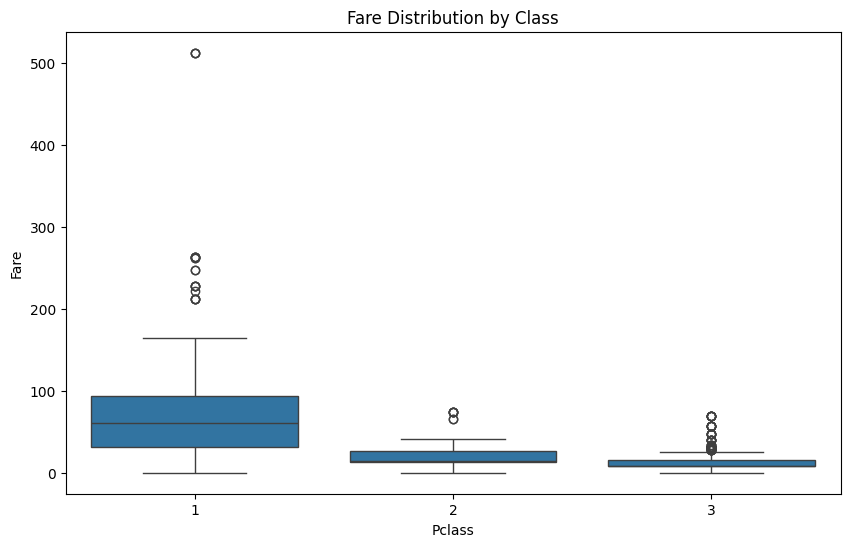

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare Distribution by Class')

Text(0.5, 1.0, 'Survival Rate by Family Size')

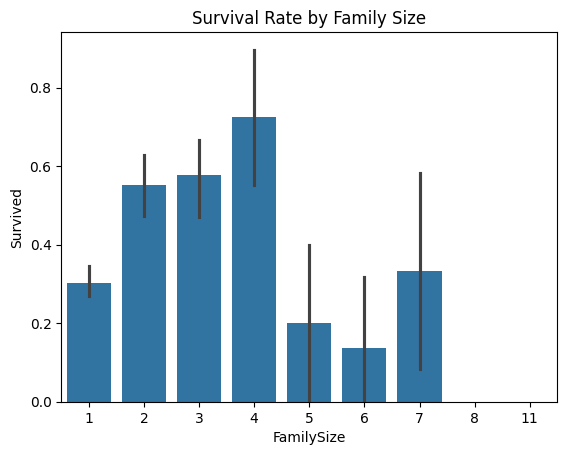

In [23]:
# Create family size column
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.title('Survival Rate by Family Size')

Text(0.5, 1.0, 'Age Distribution by Class and Survival')

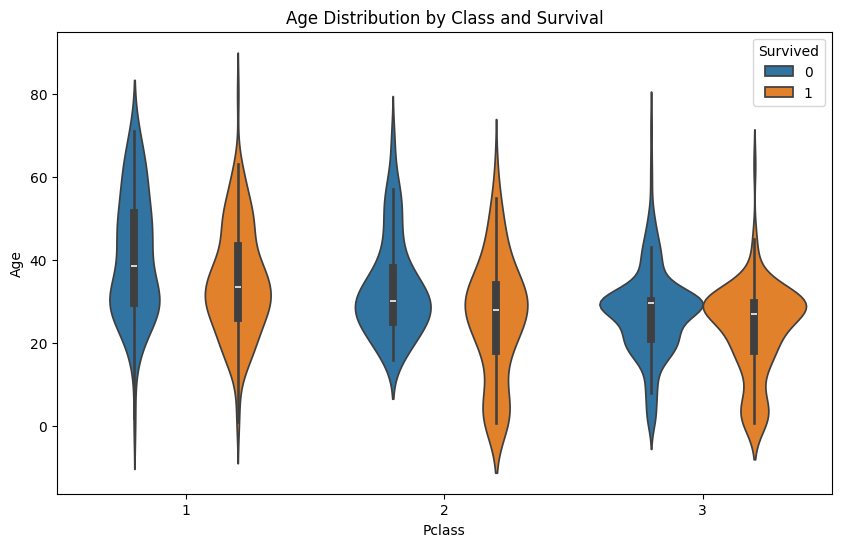

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data)
plt.title('Age Distribution by Class and Survival')